# Neural Networks 🧠🧠

Before digging into the details of what neural networks are and how they work, let's contemplate a quote from visionnary physicist Stephen Hawking :

_"I think the brain is essentially a computer and consciousness is like a computer program. It will cease to run when the computer is turned off. Theoretically, it could be re-created on a neural network, but that would be very difficult, as it would require all one's memories."_

He makes an analogy between the way the human brain works and computer programs, and stresses the need for memories, aka, data! We will elaborate more on this quote and the analogy at the end of lecture.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/artificial-intelligence.png" />

## What you will learn in this course ? 🧐🧐

Neural Networks are a class of models vaguely inspired by the biological neural networks in the humain brain, here's an outline of what will be covered in this lecture :

* History
* Formal neuron (weights, bias, activation function)
* Forward pass
* Chain rule (for derivating composed functions)
* Backpropagation

## History 📜📜

Artificial neural networks first appeared in the 1950s in the work of neurologists Warren McCulloch and Walter Pitts, who were the first to define a model mimicking the functioning of a neuron in a nervous system. They called this model a "formal neuron": it is a mathematical model with a "transfer function" that transforms the data it receives as input into a result according to precise rules defined when the model was specified.

Since this first introduction, and largely thanks to advances in Cloud Computing, distributed computing and the improvement of computer computing speed, models built from neural networks have led to phenomenal advances in various fields such as signal processing, natural language processing, image analysis, artificial intelligence, and many others.

# Formal Neuron 💻💻

Neural networks are made up of layers composed of neurons. Formal neurons are just functions that turn inputs into outputs according to a certain number of rules and specifications. We will now present the most simple kind of components of artificial neural networks : the densely (or fully-connected) neuron :

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/Formal_neuron.png" />

The above figure represents a formal neuron as it would work when included in a network structure, let's explain the different elements represented here :

* At the input of the neuron, we have a number of input values $i_1, \dots, i_p$. These inputs are float values that are either coming from the variables in the data or from other neurons in the network. (we will elaborate on that in what follows)
* The inputs go into the neuron defined by the blue zone. Each input is multiplied by a weight $w_1j, ..., w_pj$ determined specifically for that neuron of index $j$. The weights are parameters of the neuron and they will be trained through gradient descent.
* The weighted inputs go through a combination function noted $\sum$ because most often the combination function is a simple sum.
* We then add a bias to the linear combination of input noted $\theta_j$ it is a parameter associated with neuron $j$ and it will also be trained through gradient descent.
* The result $w_{1j} \times i_1 + \dots + w_{pj} \times i_p + \theta_j$ is passed to an activation function $\Phi$. The activation function will most of the time be non-linear in order to give a non-linear behavior to the neural network. More detail will be given on activation functions later on.
* The output of the formal neuron is $\Phi(w_{1j} \times i_1 + \dots + w_{pj} \times i_p + \theta_j)$

The most important things to remember about formal neurons are the following : A fully-connected formal neuron has $p+1$ parameters, where $p$ represents the dimension of the input, and what gives it a non-linear behavior is the activation function.

## Activation function 💡💡

Activation functions are essential to neural network models because they are bringing non-linearity to the way a formal neuron neuron transforms its input into an output.

We will talk about several activation functions in what follows and go into much detail about them, let's mention some of these functions here and give some of their advantages and shortcomings :

### ReLu

The rectified linear unit function (noted ReLu):

$$
ReLu(x)=x^{+}=max(0,x)
$$


is one of the simplest non-linear functions that can be included in a neural network.

* Advantages
  * Computationally efficient—allows the network to converge very quickly
  * Non-linear—although it looks like a linear function, ReLU has a derivative function and allows for backpropagation
* Disadvantages
  * The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.

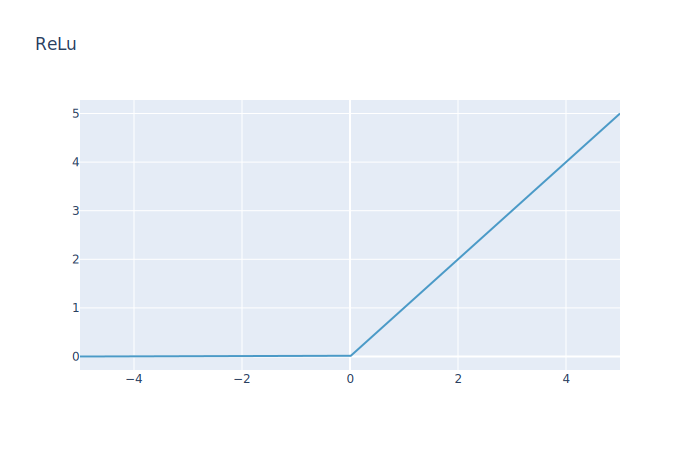

In [1]:
import numpy as np
import plotly.graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
x = np.linspace(-5, 5, num=1000)
y = (np.abs(x) + x)/2
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         mode = "lines",
                         marker=dict(
        color=color_chart[0])))
fig.update_layout(title="ReLu")
fig.show("svg")

### Leaky ReLU
* Advantages
  * Prevents dying ReLU problem—this variation of ReLU has a small positive slope in the negative area, so it does enable backpropagation, even for negative input values
  * Otherwise like ReLU, although a little slower to compute
* Disadvantages
  * Results not consistent

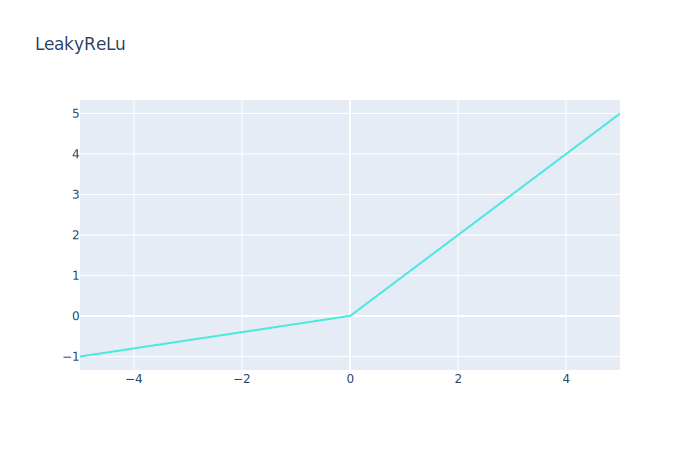

In [2]:
x = np.linspace(-5, 5, num=1000)
y = (np.abs(x) + x)/2 - (np.abs(x) - x)/10
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         mode = "lines",
                         marker=dict(
        color=color_chart[1])))
fig.update_layout(title="LeakyReLu")
fig.show("svg")

### Sigmoïd
* Advantages
  * Smooth gradient, preventing “jumps” in output values.
Output values bound between 0 and 1, normalizing the output of each neuron.
Clear predictions—For X above 2 or below -2, tends to bring the Y value (the prediction) to the edge of the curve, very close to 1 or 0. This enables clear predictions.
* Disadvantages
  * Vanishing gradient—for very high or very low values of input, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
  * Outputs not zero centered.
  * Computationally expensive

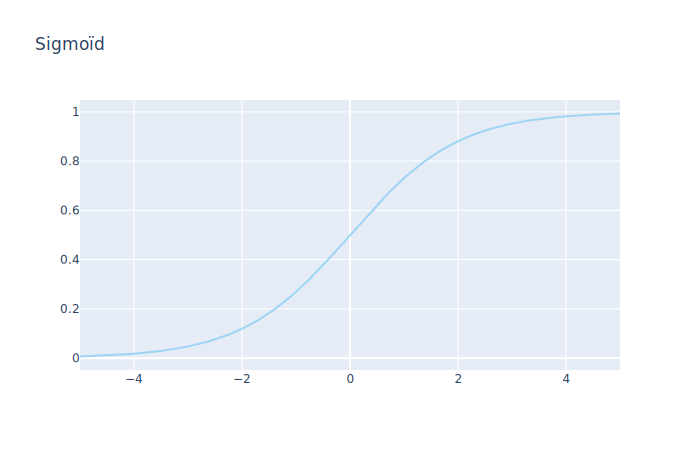

In [3]:
x = np.linspace(-5, 5, num=1000)
y = 1/(1+np.exp(-x))
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         mode = "lines",
                         marker=dict(
        color=color_chart[2])))
fig.update_layout(title="Sigmoïd")
fig.show("svg")

### TanH / Hyperbolic Tangent
* Advantages
  * Zero centered—making it easier to model inputs that have strongly negative, neutral, and strongly positive values.
  * Otherwise like the Sigmoid function.
* Disadvantages
  * Like the Sigmoid function

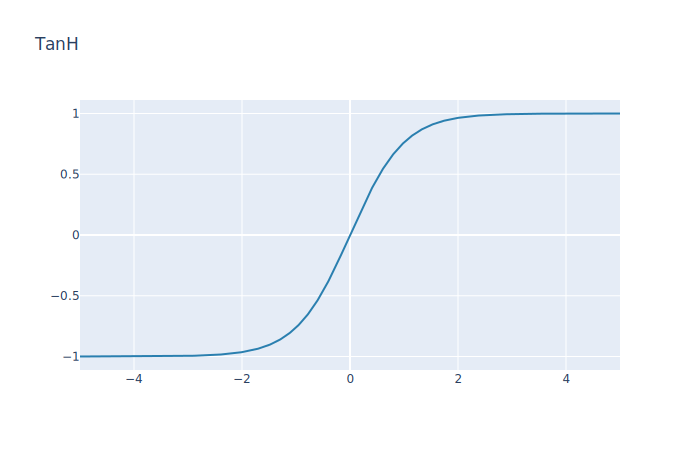

In [4]:
x = np.linspace(-5, 5, num=1000)
y = np.tanh(x)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         mode = "lines",
                         marker=dict(
        color=color_chart[4])))
fig.update_layout(title="TanH")
fig.show("svg")

### Swish
Swish is a new, self-gated activation function discovered by researchers at Google. According to their paper, it performs better than ReLU with a similar level of computational efficiency. In experiments on ImageNet with identical models running ReLU and Swish, the new function achieved top -1 classification accuracy 0.6-0.9% higher.

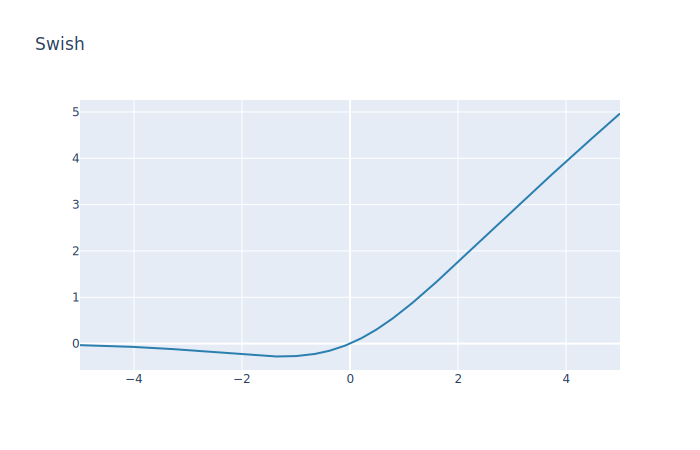

In [6]:
x = np.linspace(-5, 5, num=1000)
y = x / (1+np.exp(-x))
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         mode = "lines",
                         marker=dict(
        color=color_chart[4])))
fig.update_layout(title="Swish")
fig.show("svg")

## Neural Networks 🧠🧠

A neural network is a collection of formal neurons, organized in layers. The way these layers are connected with each other may take several forms and we will have the opportunity to study a lot of them in the future. But for now we will focus on a specific type of organisation of the network (commonly called architecture) which is the sequential architecture.

A sequential architecture, as its name suggests, is organized in the following way:

* The first layer (also called input layer or bottom layer) takes the data variables as input
* The following layers (also called hidden layers) use the outputs of the previous layer as input
* The last layer (also called output layer or top layer) produces the output from which we make the prediction

The figure below represents an exemple of what a sequential model architecture made of densely connected layers may look like:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/neural_network_diagram.png" />

This may look intimidating, but remember, a model is never more than a function $h$, an hypothetesis that data scientists form around what the actual function $f$ linking the input variables $X$ to the target variable $Y$ looks like.

Neural networks are only a visual way of representing functions that we use for tackling difficult problems. Neural networks are chained compositions of functions that make it possible to form complex and highly non-linear functions.

The number of layers in the network, the number of neurons on each layer and their respective activation functions are all hyperparameters of the model which have to be chosen by the data scientist prior to training the model.

By now you may wonder how do we choose how many layers to include in our neural network? Or how many neurons should be on each layer? These are all really great questions, neural networks are a very empirical branch of machine learning, and a lot of what we know about neural networks comes from trial and error and comparing models on comparable challenges. This introductory lesson's goal is also to give you some practical intuition on neural networks in addition to the theoretical background.

## Forward pass ▶️▶️

The forward pass mentioned in the figure indicates the way that the neural network transforms the inputs into outputs.If we were to write the forward pass it would look like this:

$$
\begin{aligned}
output = \; & \Phi_{output}(w_{o,(2,1)} \times n_{2,1} + w_{o,(2,2)} \times n_{2,2} + w_{o,(2,3)} \times n_{2,3} + \theta_{output}) \\
n_{2,1} = \; & \Phi_{2,1}(w_{(2,1),(1,1)} \times n_{1,1} + w_{(2,1),(1,2)} \times n_{1,2} + w_{(2,1),(1,3)} \times n_{1,3} + w_{(2,1),(1,4)} \times n_{1,4} + w_{(2,1),(1,5)} \times n_{1,5} + \theta_{(2,1)}) \\
n_{2,2} = \; & \Phi_{2,2}(w_{(2,2),(1,1)} \times n_{1,1} + w_{(2,2),(1,2)} \times n_{1,2} + w_{(2,2),(1,3)} \times n_{1,3} + w_{(2,2),(1,4)} \times n_{1,4} + w_{(2,2),(1,5)} \times n_{1,5} + \theta_{(2,2)}) \\
n_{2,3} = \; & \Phi_{2,3}(w_{(2,3),(1,1)} \times n_{1,1} + w_{(2,3),(1,2)} \times n_{1,2} + w_{(2,3),(1,3)} \times n_{1,3} + w_{(2,3),(1,4)} \times n_{1,4} + w_{(2,3),(1,5)} \times n_{1,5} + \theta_{(2,3)}) \\
n_{1,1} = \; & \Phi_{1,1}(w_{(1,1), 1} \times x_1 + \dots + w_{(1,1),p} \times x_p + \theta_{(1,1)}) \\
n_{1,2} = \; & \Phi_{1,2}(w_{(1,2), 1} \times x_1 + \dots + w_{(1,2),p} \times x_p + \theta_{(1,2)}) \\
n_{1,3} = \; & \Phi_{1,3}(w_{(1,3), 1} \times x_1 + \dots + w_{(1,3),p} \times x_p + \theta_{(1,3)}) \\
n_{1,4} = \; & \Phi_{1,4}(w_{(1,4), 1} \times x_1 + \dots + w_{(1,4),p} \times x_p + \theta_{(1,4)}) \\
n_{1,5} = \; & \Phi_{1,5}(w_{(1,5), 1} \times x_1 + \dots + w_{(1,5),p} \times x_p + \theta_{(1,5)}) \\
\end{aligned}
$$

Not so easy read this kind of formula, and believe it or not, the presented model is rather small! Which is why we will mostly use other ways of representing neural network models grahically. 

Like we said, the forward pass is the way the model will transform the inputs into outputs, therefore when defining the architecture of the model, the data scientist has to keep two main things in mind:
* The input dimension : the number of weights on each neuron of the input layer will depend on the dimension of the output, we will how that translates in practice.
* The dimension of the target variable (the type of problem) : The number and the characteristics of the neurons on the output layer depends on the target variable we are trying to predict, we will see how to do this in practice as well.

## Back Propagation ◀️◀️

Back Propagation is the term used for the way a deep neural network model will optimize its parameters in order to find the loss function's minimum, the good news is that it is in fact nothing more than a batch gradient descent algorithm that will be computed step by step from the top layer backward all the way to the bottom layer, the bad news is... well there is not really a bad news, except from the fact that it may seem a little intimidating at first.

### Chain rule

As we mentionned earlier, nack propagation is done layer by layer starting from the top layer and moving backward all theway to the bottom layer. To achieve this decomposition, we are going to use a property of derivation operations called the chain rule.

The chain rule is used to calculate the derivative of composed functions. Let $f$ and $g$ be two differentiable functions and $w$ a parameter of $g$, the derivative of $f \circ g(w)$ is (all notations are equivalent):

$$
\begin{aligned}
(f \circ g )'(w) & = f'\circ g(w) \times g'(w) \\
\frac{\partial (f \circ g)}{\partial w}(w) & = \frac{\partial f}{\partial g(w)}(g(w)) \times \frac{\partial g}{\partial w}(w) \\
\frac{\partial (f(g(w)))}{\partial w} & = \frac{\partial f}{\partial g} \times \frac{\partial g}{\partial w}
\end{aligned}
$$

It may seem a little unclear at this point, but this makes it possible to differentiate composed functions one step at a time in order to get the final value of the derivative without having to compute the whole analytical expression of the derivative.

### Backpropagation example

Let's take the example of a very simple neural network model with two layers, thetop layer has one neuron on it with ReLu activation and the bottom layer has two neurons with Relu activation and we have two input variables $x_1$ and $x_2$.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/backprop1.png" />

The output of the final neuron is compared to the target variable thanks to a loss function $C$, which can be computed for a single observation in the data. We said earlier that we use batch gradient descent to train deep learning models, meaning we have to compute the gradient of the loss function for a batch of observations in order to update each parameter in the model.

A direct strategy to do this would be to calculate the full gradient of the loss function:

$$
\nabla_{w_{11},w_{12},\theta_{1,1}, w_{21},w_{22}, \theta_{1,2},w_{1},w_{2}, \theta_{2,1}} C(y_{pred},y) = (\frac{\partial C(y_{pred},y)}{\partial w_{11}}, \frac{\partial C(y_{pred},y)}{\partial w_{12}}, \frac{\partial C(y_{pred},y)}{\partial \theta_{1,1}}, \frac{\partial C(y_{pred},y)}{\partial w_{21}}, \frac{\partial C(y_{pred},y)}{\partial w_{22}}, \frac{\partial C(y_{pred},y)}{\partial \theta_{1,2}}, \frac{\partial C(y_{pred},y)}{\partial w_{1}}, \frac{\partial C(y_{pred},y)}{\partial w_{2}}, \frac{\partial C(y_{pred},y)}{\partial \theta_{2,1}})
$$

That would be acceptable in this case since we have only 9 parameters to udpate after each batch, but for more complex architectures it would just become a nightmare but also way too long to compute directly. Which is where the chain rule comes in :

Let's only calculate the portion of the gradient for $\theta_{2,1}$, $w_{1}$ and $w_2$:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/backprop2.png" />

We have:

$$
\begin{aligned}
\frac{\partial C(y_{pred},y)}{\partial w_{1}} & = \frac{\partial C}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial w_1} \\
\frac{\partial C(y_{pred},y)}{\partial w_{2}} & = \frac{\partial C}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial w_2} \\
\frac{\partial C(y_{pred},y)}{\partial \theta_{2,1}} & = \frac{\partial C}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\theta_{2,1}} \\
\end{aligned}
$$

That is the first step of the back propagation. We can now cache (meaning save in memory) the results of these computations and move on to the next layer :

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/backprop3_2.png" />

The gradient portion regarding $n_{1,1}$ can be easily obtained from the cached value of the gradient for $w_1$, similarly the gradient portion regarding $n_{1,2}$  can be easily computed from the cached value of the gradient for $w_2$, as follows:

$$
\begin{aligned}
\frac{\partial C(y_{pred},y)}{\partial w_{11}} & = \frac{w_1}{n_{1,1}} \underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{1}}}_
    {\text{already cached}} \times \frac{\partial n_{1,1}}{\partial w_{11}} \\
\frac{\partial C(y_{pred},y)}{\partial w_{12}} & = \frac{w_1}{n_{1,1}} \underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{1}}}_
    {\text{already cached}} \times \frac{\partial n_{1,1}}{\partial w_{12}} \\
\frac{\partial C(y_{pred},y)}{\partial \theta_{1,1}} & = \frac{w_1}{n_{1,1}}\underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{1}}}_
    {\text{already cached}} \times \frac{\partial n_{1,1}}{\partial \theta_{1,1}} \\
\frac{\partial C(y_{pred},y)}{\partial w_{21}} & = \frac{w_2}{n_{1,2}} \underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{2}}}_
    {\text{already cached}} \times \frac{\partial n_{1,2}}{\partial w_{21}} \\
\frac{\partial C(y_{pred},y)}{\partial w_{22}} & = \frac{w_2}{n_{1,2}}\underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{2}}}_
    {\text{already cached}} \times \frac{\partial n_{1,2}}{\partial w_{22}} \\
\frac{\partial C(y_{pred},y)}{\partial \theta_{1,2}}& = \frac{w_2}{n_{1,2}}\underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{2}}}_
    {\text{already cached}} \times \frac{\partial n_{1,2}}{\partial \theta_{1,2}} \\
\end{aligned}
$$

The full computation leading to the expressions above is out of the scope of this lecture. However, if you're a fond of maths and an expert in partial derivatives, you can have a glance at the annex at the end of this notebook 🤓

This trick makes it possible to compute only one derivation operation for each parameter which saves a lot of time, it also sheds light on many of the remarks previously made on the activation functions. Indeed the gradient's components for the parameters of one layer depend on the product of all the gradient's components of the neurons connected to it further up in the network, therefore if one of these gradient's component is equal to $0$ then no contribution is made from this part of the network (this can happen for ReLu activation function, this phenomenon is known as dying ReLu). This can also lead to decreasing values of the gradient's components as you move down deeper in the network (this can happen with sigmoïd and tanH activation functions and is called vanishing gradient).

## Training a neural network 🏃🏃

Training a neural network by batch gradient descent should no longer seem so nebulous to you at this point, we have just explained how the parameters in the network can be updated thanks to one batch of data, all that is left to do is loop over all batches in the dataset in order to complete an **epoch**, and then start next **epoch** by shuffling the dataset and creating a new set of batch and repeat !

Let's review all the steps one last time so that we are all on the same page !
* **Model building** : choose the number of layers, the number of neurons on each layer, the activation function on each neuron (usually it is the same one in the whole network to the exception of the final layer, we will see why) and all other hyper-parameters of the model
* **Initialize the parameters** : this step sets a starting value for each parameter in the network (it can be random or set manually, if you chose activation functions that can saturate, make sure the initial parameters are not too high and that your data is normalized)
* **Start the training**:
  * Choose a learning rate (we will learn more about this later)
  * The training set is shuffled and split into several batches of a given size
  * A first batch of data goes through the network (this is called the forward pass) and an output is formed for each of the observations in the batch.
  * The value of the loss function is computed by comparing every output with the target value
  <img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/forward_pass_batch.png" />
  * By using the chain rule, the components of the gradient of the loss function are computed for each parameter in the network and the parameters get an update based on the learning rate and the gradient. This is the back propagation step (for clarity purposes we have not represented all the red arrows represented the computations of the gradient's components).
  <img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/back_prop_batch.png" />
  * When this is done, a new batch of data is passed to the network and new outputs are computed based on the updated parameters. Backpropagation happens again, and these two steps are repeated until the end of the epoch, when all batches have gone through the network.
  * The training stops when the desired number of epochs is achieved.
* By the end of all this your neural network is trained and ready to make predictions !

## Annex - Backpropagation example 🤓🤓

We would like to find an expression of the different partial derivatives of the loss function $C(y_{pred},y)$ with respect to each parameter of the neural network. What's more, we would like to find a smart way of performing the computations, by being able to re-use the derivatives that were already computed for the top layer, to deduce the derivatives of the hidden layer (this is the principle of backpropagation).

From the neural network architecture shown as an example in this lecture, we have :

$$
\begin{aligned}
y_{pred} = n_{2,1} = \; & \Phi_{2,1}(w_{1} \times n_{1,1} + w_{2} \times n_{1,2} + \theta_{2,1}) = \Phi_{2,1}(z_{2,1}) \\
n_{1,1} = \; & \Phi_{1,1}(w_{1,1} \times x_1 + w_{1,2} \times x_2 + \theta_{1,1}) = \Phi_{1,1}(z_{1,1}) \\
n_{1,2} = \; & \Phi_{1,2}(w_{2,1} \times x_1 + w_{2,2} \times x_2 + \theta_{1,2}) = \Phi_{1,2}(z_{1,2})
\end{aligned}
$$

Let's compute the derivatives of $C(y_{pred},y)$ with respect to the top layer parameters :

$$
\begin{aligned}
\frac{\partial C}{\partial w_1} &= \frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}} \frac{\partial z_{2,1}}{\partial w_1} \\
&= n_{1,1}\frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}}\\
\frac{\partial C}{\partial w_2} &= \frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}} \frac{\partial z_{2,1}}{\partial w_2} \\
&= n_{1,2}\frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}}\\
\frac{\partial C}{\partial \theta_{2,1}} &= \frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}}\\
\end{aligned}
$$

Let's do the same for the derivatives with respect to the hidden layer parameters. Let's detail the whole process for $w_{1,1}$ :

$$
\begin{aligned}
\frac{\partial C}{\partial w_{1,1}} &= \frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}} \frac{\partial z_{2,1}}{\partial n_{1,1}}\frac{\partial n_{1,1}}{\partial z_{1,1}}\frac{\partial z_{1,1}}{\partial w_{1,1}} \\
&= w_1 x_1 \frac{\partial C}{\partial n_{2,1}} \frac{\partial n_{2,1}}{\partial z_{2,1}}\frac{\partial n_{1,1}}{\partial z_{1,1}} \\
&= \frac{w_1 x_1}{n_{1,1}} \frac{\partial C}{\partial w_1} \frac{\partial n_{1,1}}{\partial z_{1,1}}
\end{aligned}
$$

Now, to make appear in this expression something that depends on the derivatives from the top layer, let's find use the following trick :

$$
\begin{aligned}
\frac{\partial n_{1,1}}{\partial w_{1,1}} &= \frac{\partial n_{1,1}}{\partial z_{1,1}}\frac{\partial z_{1,1}}{\partial w_{1,1}} \\
&= x_1 \frac{\partial n_{1,1}}{\partial z_{1,1}}
\end{aligned}
$$

Now by substitution, we end up with the expression : 

$$
\begin{aligned}
\frac{\partial C}{\partial w_{1,1}} = \frac{w_1 x_1}{n_{1,1}} \frac{\partial C}{\partial w_1} \frac{1}{x_1}\frac{\partial n_{1,1}}{\partial w_{1,1}}
\end{aligned}
$$

And finally :

$$
\begin{aligned}
\frac{\partial C}{\partial w_{1,1}} = \frac{w_1}{n_{1,1}} \underbrace{\frac{\partial C}{\partial w_1}}_
    {\text{already cached}}\frac{\partial n_{1,1}}{\partial w_{1,1}}
\end{aligned}
$$

Summing up and considering all the hidden layer parameters, we get :

$$
\begin{aligned}
\frac{\partial C(y_{pred},y)}{\partial w_{11}} & = \frac{w_1}{n_{1,1}} \underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{1}}}_
    {\text{already cached}} \times \frac{\partial n_{1,1}}{\partial w_{11}} \\
\frac{\partial C(y_{pred},y)}{\partial w_{12}} & = \frac{w_1}{n_{1,1}} \underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{1}}}_
    {\text{already cached}} \times \frac{\partial n_{1,1}}{\partial w_{12}} \\
\frac{\partial C(y_{pred},y)}{\partial \theta_{1,1}} & = \frac{w_1}{n_{1,1}}\underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{1}}}_
    {\text{already cached}} \times \frac{\partial n_{1,1}}{\partial \theta_{1,1}} \\
\frac{\partial C(y_{pred},y)}{\partial w_{21}} & = \frac{w_2}{n_{1,2}} \underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{2}}}_
    {\text{already cached}} \times \frac{\partial n_{1,2}}{\partial w_{21}} \\
\frac{\partial C(y_{pred},y)}{\partial w_{22}} & = \frac{w_2}{n_{1,2}}\underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{2}}}_
    {\text{already cached}} \times \frac{\partial n_{1,2}}{\partial w_{22}} \\
\frac{\partial C(y_{pred},y)}{\partial \theta_{1,2}}& = \frac{w_2}{n_{1,2}}\underbrace{\frac{\partial C(y_{pred},y)}{\partial w_{2}}}_
    {\text{already cached}} \times \frac{\partial n_{1,2}}{\partial \theta_{1,2}} \\
\end{aligned}
$$

## Ressources 📚📚

* <a href="https://www.youtube.com/watch?v=Ilg3gGewQ5U">A video explaining backpropagation in a visual way </a>

* <a href="https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/"> A very good blog article on how to code a neural network model from scratch </a>

* <a href="https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414"> An article on the history of neural networks</a>